In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.7 MB/s eta 0:00:27
   ---------------------------------------- 1.3/150.0 MB 3.4 MB/s eta 0:00:45
    --------------------------------------- 2.1/150.0 MB 3.8 MB/s eta 0:00:40
    --------------------------------------- 2.9/150.0 MB 3.8 MB/s eta 0:00:39
    --------------------------------------- 3.7/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 4.5/150.0 MB 3.8 MB/s eta 0:00:38
   - -------------------------------------- 5.2/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 6.0/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 6.8/150.0 MB 3.8 MB/s eta 0:00:38
   -- ------------------------------------- 7.6/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.4/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 9.2/150.0 MB 3.7 MB/s eta 0

In [44]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [5]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.shape

(569, 33)

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop(['id', "Unnamed: 32"], axis=1)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : '1' if x == 'M' else '0')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#from sklearn.preprocessing import OneHotEncoder
#df['diagnosis']=df['diagnosis'].astype('category')
#df['diagnosistics']=df['diagnosis'].cat.codes
#enc=OneHotEncoder()
#enc_df=pd.DataFrame(enc.fit_transform(df[['diagnosistics']]).toarray())

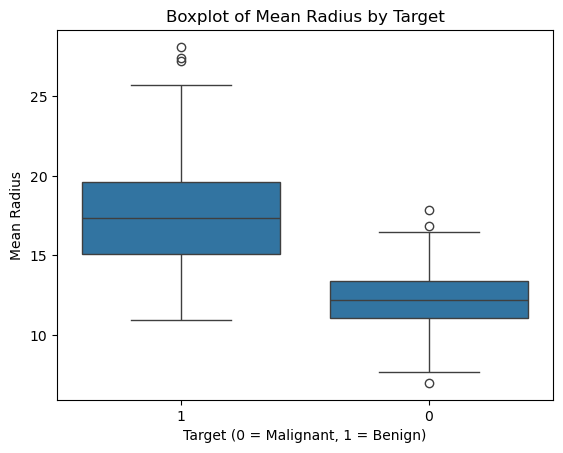

In [17]:
#identify outlier
df['diagnosis'] = df.diagnosis
sns.boxplot(x=df['diagnosis'], y=df['radius_mean'])
plt.title("Boxplot of Mean Radius by Target")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Radius")
plt.show()

In [16]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5 * IQR

In [17]:
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [18]:
# Data Exploration & Analysis

corr = df.corr() 
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


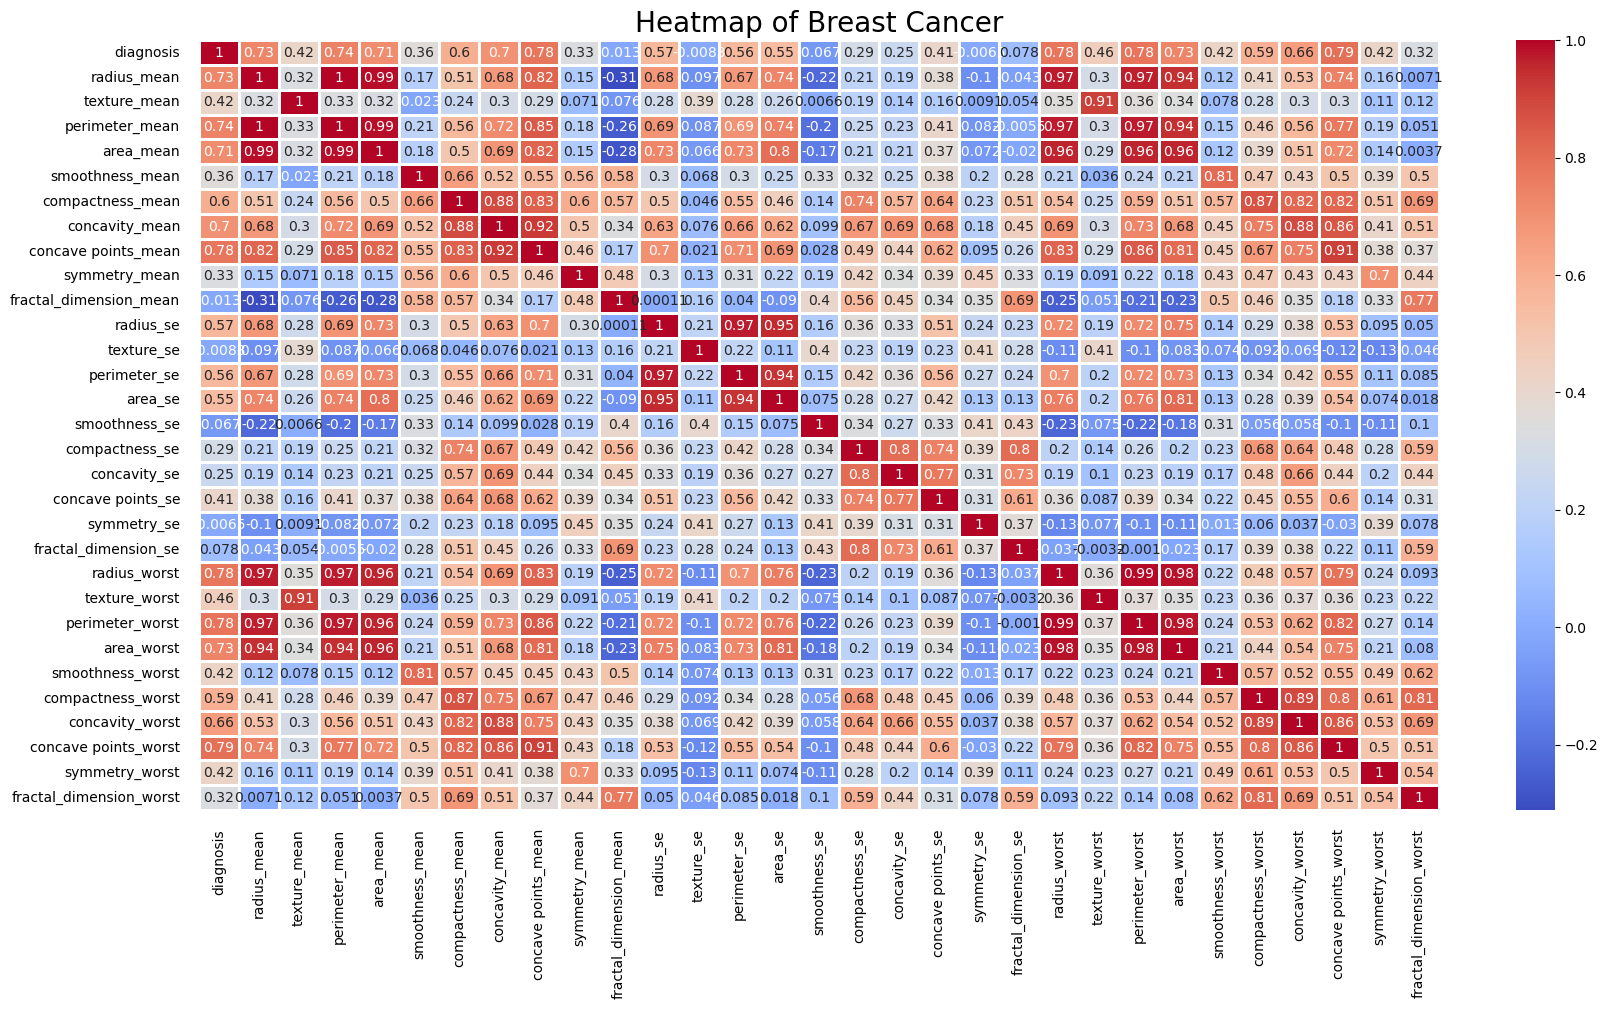

In [19]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm', linewidths =2)
ax.tick_params(size=10,color="w")
plt.title("Heatmap of Breast Cancer",fontsize=20)
plt.show()

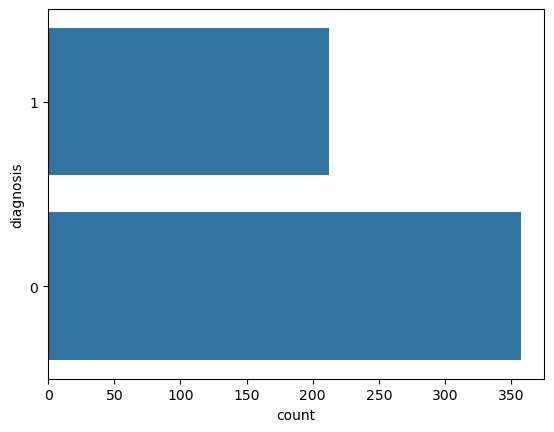

In [22]:
sns.countplot(df['diagnosis'])
plt.show()

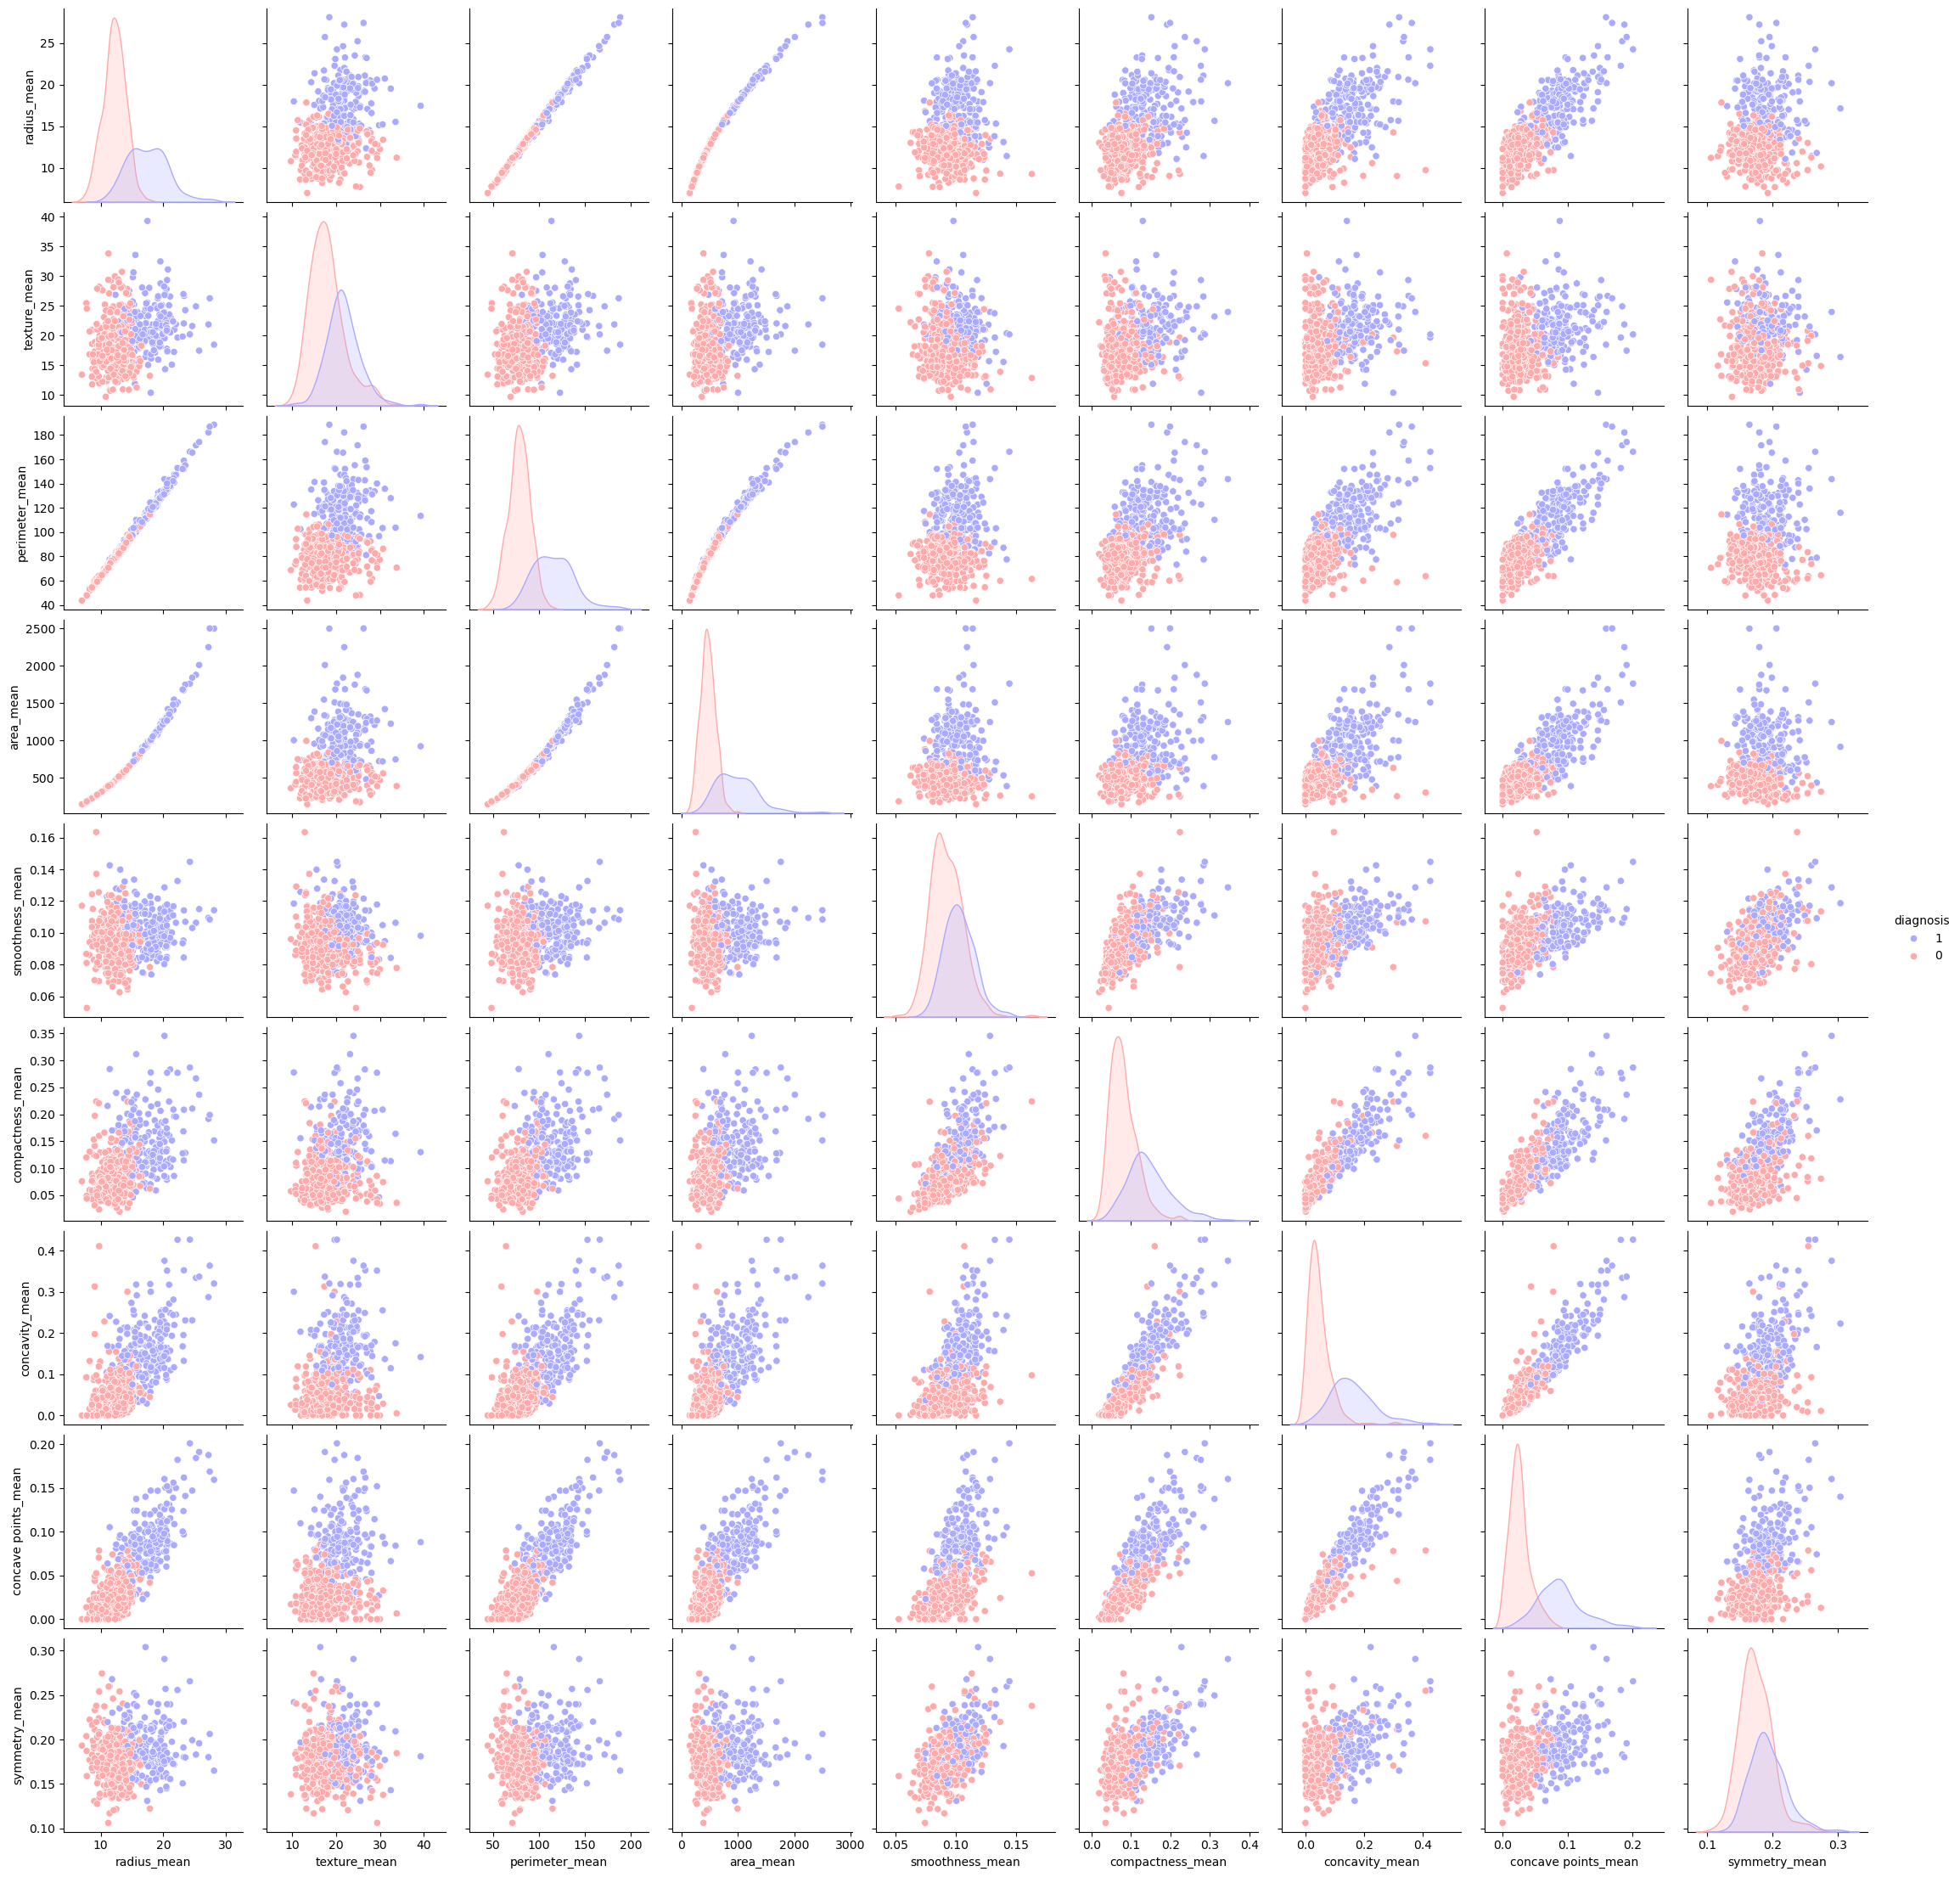

In [23]:
#pairplot
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')


<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

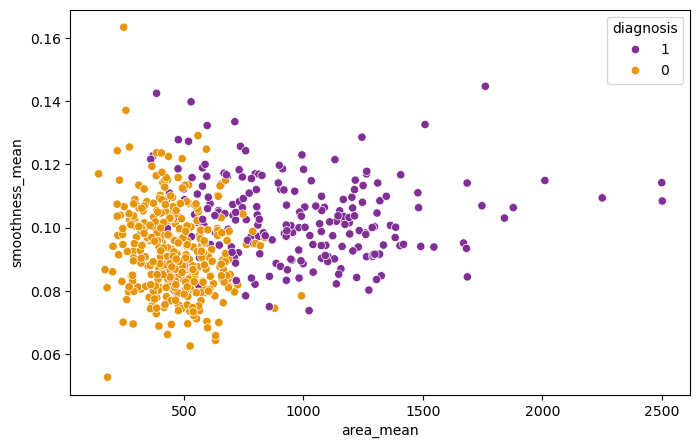

In [24]:
#scatterplot
sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=df, palette='CMRmap')

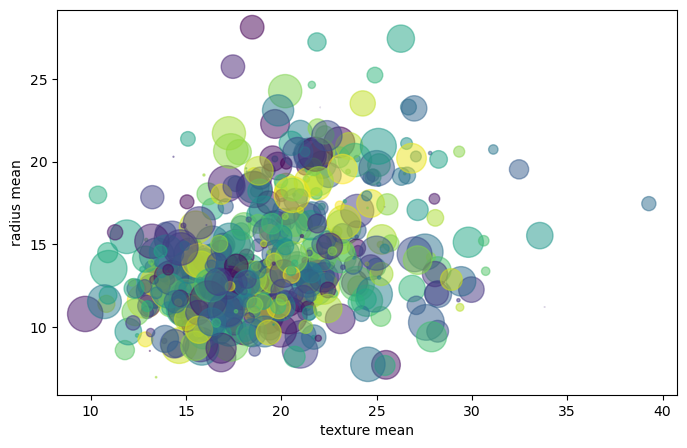

In [25]:
# texture mean vs radius_mean

size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c= colors, alpha=0.5)

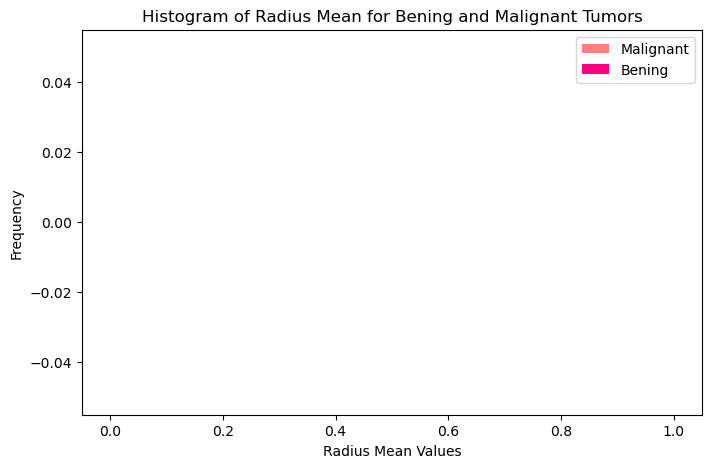

In [26]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

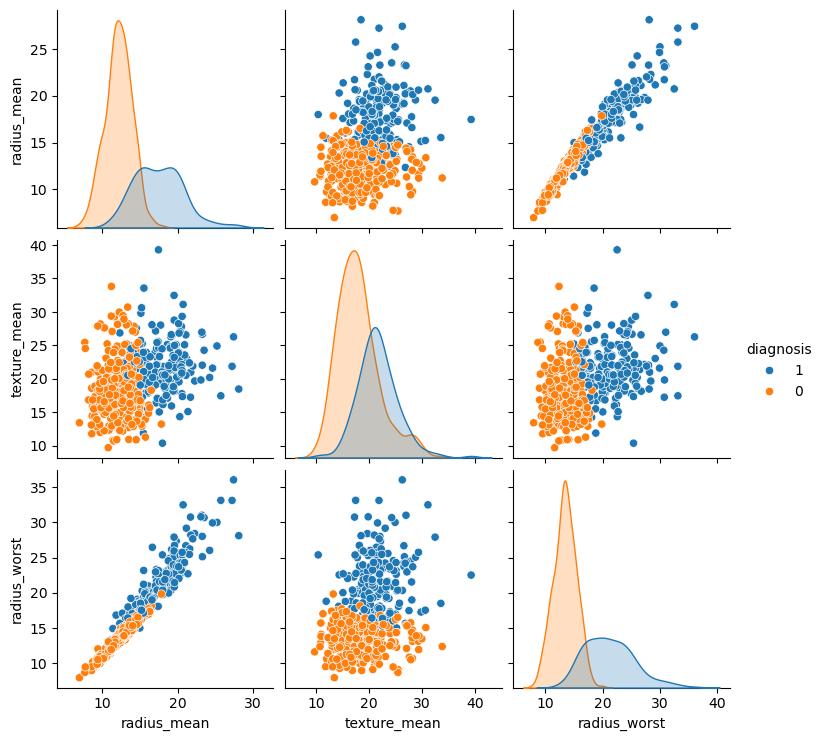

In [27]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'radius_worst', 'diagnosis']], hue='diagnosis')
plt.show()

In [20]:
#Spilitting of Data in Train And Test
X = df.drop('diagnosis', axis =1).values # Feature variables
y = df['diagnosis'].values # Target variable


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
y_pred_test = DT.predict(X_test)


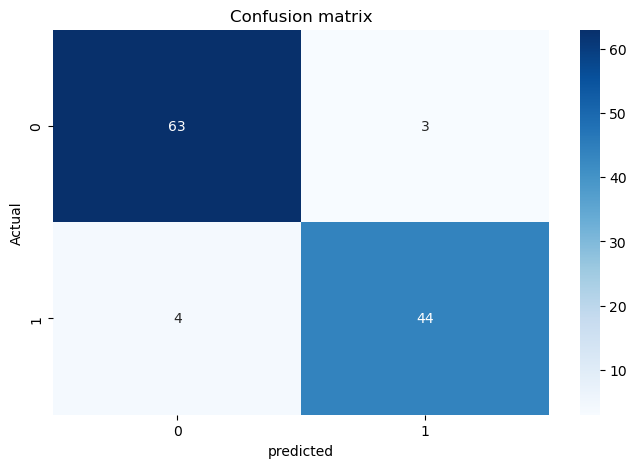

In [32]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of test set: ", accuracy_test)

Accuracy of test set:  0.9385964912280702


In [24]:
#IMPROVING THE DECISION TREE CLASSIFICATION MODEL
#prediction values for train set
y_pred_train = DT.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [25]:
#The accuracy for train set is 100%. Hence, the model is overfitted.
## Initialising the improved model by specifying the hyperparameters and fitting it to data
DT_improved = DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10, random_state=0)
DT_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       random_state=0)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated score:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated score: 0.9274725274725274
Test set accuracy: 0.956140350877193


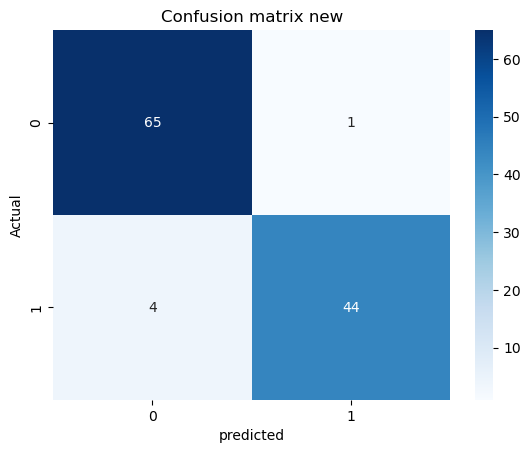

In [27]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix new")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
####### DECISION TREE CLASSIFIER: ANOTHER METHOD
model = DecisionTreeClassifier()
#tuning parameters
parameters = {'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
              'max_features': ['sqrt','log2', None]}
#grid search cv
grid_search = GridSearchCV(model, parameters, cv=10)

grid_search.fit(X_train, y_train)
print("beat score:", grid_search.best_score_)
print("best estimator:", grid_search.best_estimator_)
print("Best Parametes:", grid_search.best_params_)

beat score: 0.9452173913043478
best estimator: DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=10)
Best Parametes: {'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 10}


In [39]:
#After hyperparameter tuning
model = DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5, min_samples_split=7)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy on Test Data:",accuracy_dt)

Accuracy on Test Data: 0.9385964912280702


In [40]:
#VISUALISING THE DECISION TREE
import graphviz
from sklearn import tree

In [41]:
#logistic model

In [42]:
model = LogisticRegression(max_iter=1000)
#Tuning parameters
parameters = {'C':[0.001, 0.01, 0.1, 0.2, 0.3, 1, 10, 100, 200]}
grid_search =GridSearchCV(model, parameters, cv=10)

grid_search.fit(X_train, y_train)

print("best score:", grid_search.best_score_)
print("best estimator:", grid_search.best_estimator_)
print("best parameters:", grid_search.best_params_)


best score: 0.9758454106280194
best estimator: LogisticRegression(C=0.3, max_iter=1000)
best parameters: {'C': 0.3}


In [43]:
#After hyperparameter tuning
model = LogisticRegression(C = 0.3)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy on Test Data:",accuracy_lr)

Accuracy on Test Data: 0.9912280701754386


In [44]:

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [45]:
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,1,47


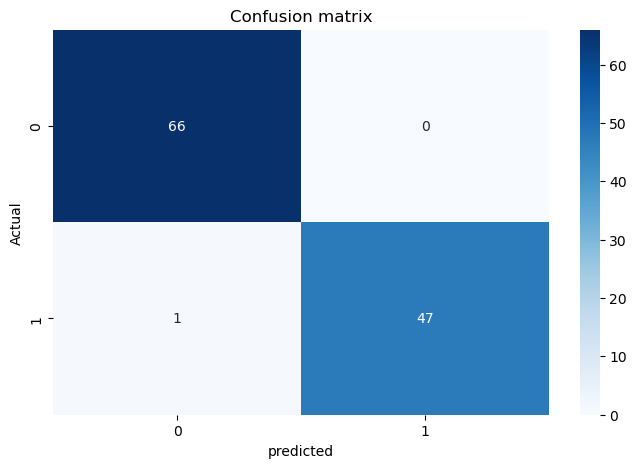

In [46]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
####RANDOM FOREST CLASSIFIER
model_rf = RandomForestClassifier()
# Tunning Paramaters
parameters = {'n_estimators': [100,150,200,250,300],
              'max_depth': [5,10,20, None], 
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 5, 10],
              'bootstrap': [True, False],
              } 
# GridSearchCV
grid_search = GridSearchCV(model_rf, parameters, cv=10) 

grid_search.fit(X_train, y_train) 

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

In [ ]:
model_rf = RandomForestClassifier(bootstrap = True, max_depth=10, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators=150)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on Test Data:",accuracy_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
confusion_matrix(y_test,y_pred_rf)
lr_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

In [ ]:
##SpaceVectorClassifier
#model building
model_svc = SVC()

# Tunning Paramaters
parameters = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
              'kernel' :['linear', 'poly', 'rbf', 'sigmoid']} 

# GridSearchCV
grid_search = GridSearchCV(model_svc, parameters, cv=10) 
grid_search.fit(X_train, y_train) 

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

In [33]:

#After hyperparameter tuning
model = SVC(C = 0.1, kernel = 'linear')
model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print("Accuracy on Test Data:",accuracy_svc)

Accuracy on Test Data: 0.9912280701754386


In [34]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [35]:
confusion_matrix(y_test,y_pred_svc)
lr_cm = confusion_matrix(y_test, y_pred_svc)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,1,47


In [36]:
###K-Nearest Neigbors(KNN)
#model building
model = KNeighborsClassifier()

# Tunning Paramaters
parameters = {'n_neighbors': list(range(1, 30)),
              'leaf_size': list(range(1,30)),
              'weights': [ 'distance', 'uniform']} 

# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10) 
grid_search.fit(X_train, y_train) 

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)
Best Score is  0.9671014492753625
Best Estinator is  KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')
Best Parametes are {'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}

SyntaxError: invalid syntax (945126170.py, line 17)

In [ ]:
#After hyperparameter tuning
model_knn = KNeighborsClassifier(leaf_size =1, n_neighbors =  6, weights = 'distance')
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy on Test Data:",accuracy_knn)

In [38]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
confusion_matrix(y_test,y_pred_knn)
lr_cm = confusion_matrix(y_test, y_pred_knn)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,64,2
Malignant,3,45


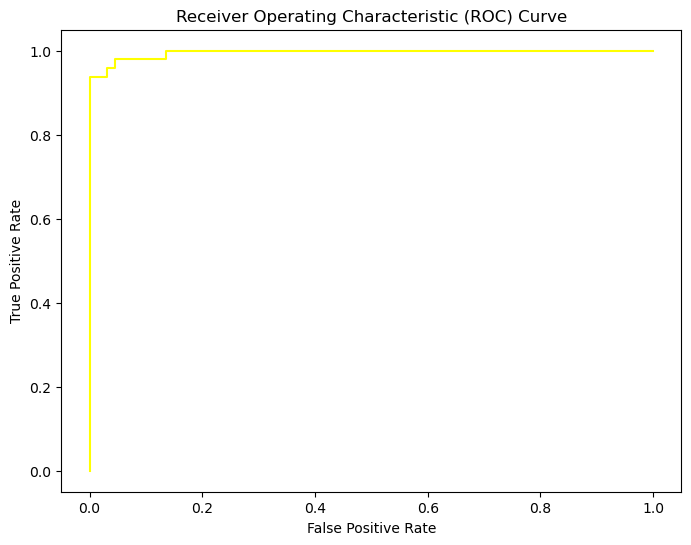

In [60]:
# Get probability of the positive class (usually class 1)
y_pred_knn_prob = model.predict_proba(X_test)[:, 1]

# Now compute ROC using probabilities
fpr, tpr, _ = roc_curve(y_test_int, y_pred_knn_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='yellow', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [41]:
df_cleaned.head(7)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.5,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [48]:
#Gaussian naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred_nb = gnb.predict(X_test)

In [52]:
acc_nb = accuracy_score(y_test,y_pred_nb)
acc_nb
#print(accuracy_score(y_test, y_pred))

0.9298245614035088

In [53]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.92      0.92      0.92        48

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [55]:
print("\nConfusion Matrix:")
cm_nb=confusion_matrix(y_test, y_pred_nb)
print(cm_nb)


Confusion Matrix:
[[62  4]
 [ 4 44]]


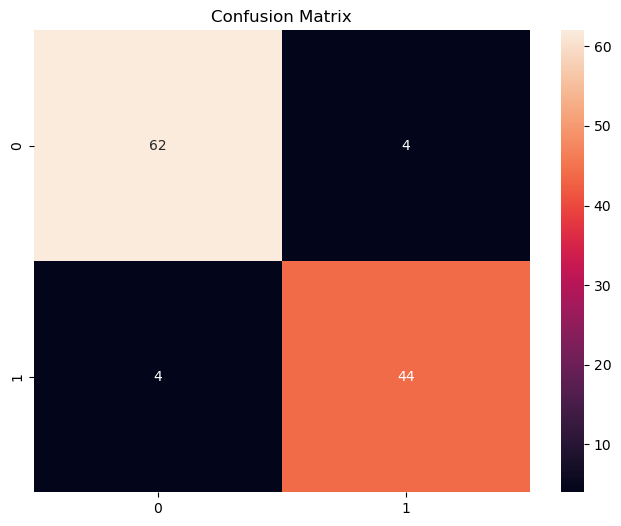

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True)
plt.title('Confusion Matrix')
plt.show()

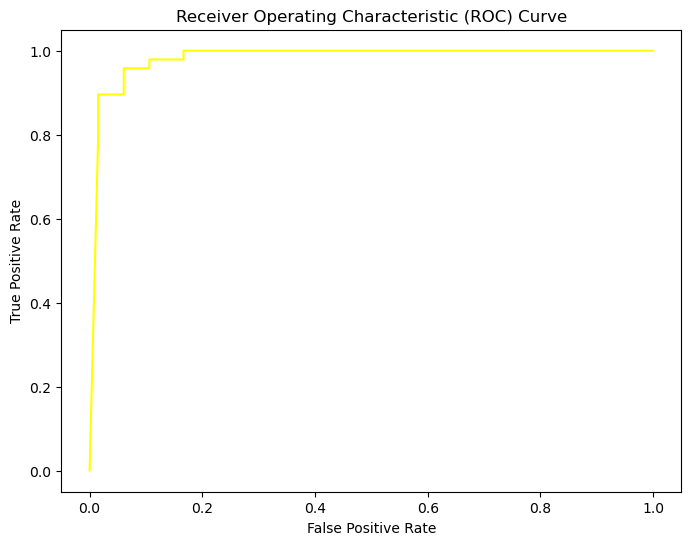

In [62]:
y_test_int = y_test.astype(int)

y_pred_nb = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_int, y_pred_nb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='yellow', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [63]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

SGDClassifier()

In [64]:
y_pred_sg = sgdc.predict(X_test)

In [65]:
sgdc_acc = accuracy_score(y_test, y_pred_sg)
print(sgdc_acc)

0.9912280701754386


In [66]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [69]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [70]:
y_pred_gb = gb_model.predict(X_test)

In [71]:
acc_gb = accuracy_score(y_test,y_pred_gb)
acc_gb

0.956140350877193

In [72]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.94      0.96      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [73]:
cm_gb=confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[63  3]
 [ 2 46]]


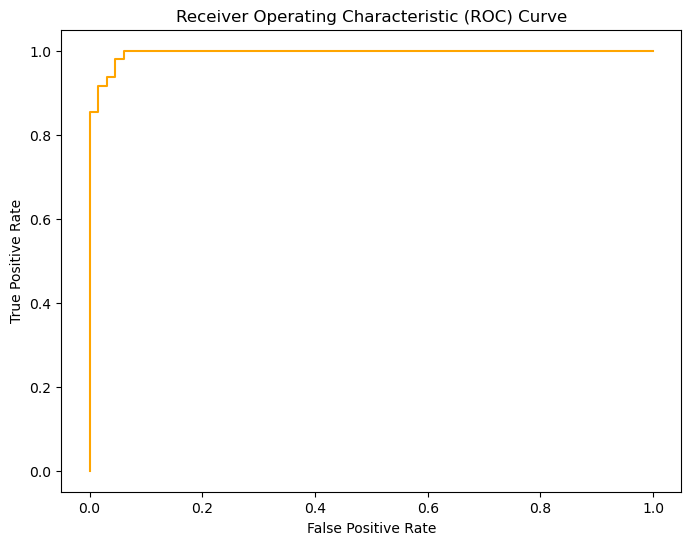

In [77]:
y_test_int = y_test.astype(int)

y_pred_gb = gb_model.predict_proba(X_test)[:, 1]

fpr,tpr,_ = roc_curve(y_test_int,y_pred_gb)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [ ]:
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Repeat similarly for the other models
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

y_pred_nb = gnb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

y_pred_sgd = sgdc.predict(X_test)
sgdc_acc = accuracy_score(y_test, y_pred_sgd)

y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

In [ ]:
results = pd.DataFrame({
    "Model": ["accuracy_lr", "accuracy_rf", "accuracy_svc", "accuracy_knn", "acc_nb", "sgdc_acc", "acc_gb"],
    "Accuracy": [ accuracy_lr, accuracy_rf, accuracy_svc, accuracy_knn, acc_nb, sgdc_acc, acc_gb]})

In [ ]:
results = results.sort_values(by="Accuracy", ascending=False)
results

In [ ]:
sns.barplot(x="Accuracy", y="Model", data=results)
plt.title("Model Comparison")
plt.show()

In [ ]:
XGB_Classifier=XGBClassifier()
XGB_Classifier.fit(X_train,y_train)
y_pre_xgb=XGB_Classifier.predict(X_test)
accuracy_score(y_test,y_pre_xgb)

In [ ]:
#############Save Model Using Pickel or Joblib

In [ ]:
import joblib

In [ ]:
filename='brest_cancer_model.sav'

In [ ]:
joblib.dump(lr,filename)

In [ ]:
model2=joblib.load('brest_cancer_model.sav')

In [ ]:
#Data That Provided By Doctor 
patient1 = [17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419
]

In [ ]:
#Convert the data to 2D array
patient1=np.array([patient1])
patient1

In [ ]:
pred=model2.predict(patient1)

In [ ]:
if pred[0]==0:
    print("patient has cancer(malignant tumor)")
else:
    print("Patient has no cancer(malignant benign)")

In [ ]:
tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[accuracy_lr]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

In [ ]:
tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

In [ ]:
same same............................

In [ ]:
plt.figure(figsize=(32,10))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.show()